<div class="alert alert-block alert-success">
    
## Data Science Libraries Quiz

### Instructions


1. Write code which will produce the specified result  
2. Enter that result in the green response cell when prompted
3. Write code comment(s) to describe the code


#### Note:

1. Complete the work without the help of others
2. Enter one code 
comment on Question 0 for 1 point 
3. There are 9 questions, each worth 11 points
    - 10 points for code and answers
    - 1 point for at least one code comment on each question
4. You can receive partial credit for your code





<div class="alert alert-block alert-info">

### Question 0 

- Run the following two cells
- Enter one code comment

In [1]:
from pydataset import data
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# loading tips dataset
df = data('tips')

In [4]:
df.head(3)

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3


In [5]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


---

<div class="alert alert-block alert-info">
  
## Question 1
        
a) What is the highest total_bill?
    
b) What time of day did this total_bill occur? 

In [6]:
# getting max total_bill value
df['total_bill'].max()

50.81

In [12]:
# getting rows where total_bill equals max value
df[df['total_bill'] == df['total_bill'].max()]

# could get specific value by calling 'time' column like so
# df[df['total_bill'] == df['total_bill'].max()]['time']

,total_bill,tip,sex,smoker,day,time,size
171,50.81,10.0,Male,Yes,Sat,Dinner,3


<div class="alert alert-block alert-success">

### Question 1 Response
    
a) 50.81
    
b) Dinner


---

<div class="alert alert-block alert-info">
  
## Question 2
    
a) What unique values are in the smoker column?
    
b) Are the majority of tables smoking or non-smoking?

In [18]:
# getting unique values for smoker column, then casting returned array to list
list(df['smoker'].unique())

['No', 'Yes']

In [14]:
# get counts of smoker column
df['smoker'].value_counts()

# can normalize to see percentages
# df['smoker'].value_counts(normalize=True)

No     151
Yes     93
Name: smoker, dtype: int64

<div class="alert alert-block alert-success">

### Question 2 Response
    
a) ['No', 'Yes']

b) Majority are **non-smoking**

---

<div class="alert alert-block alert-info">
  
## Question 3 
    
- What proportion of the bills are from the weekend (Saturday and/or Sunday)? 
    - Assume each table has one bill, regardless of table size
- Round your answer to two decimal points.

In [20]:
# get normalized frequencies
df['day'].value_counts(normalize=True)

Sat     0.356557
Sun     0.311475
Thur    0.254098
Fri     0.077869
Name: day, dtype: float64

In [29]:
# getting sum of 'Sat' and 'Sun' values (of above Series) and rounding
round( df['day'].value_counts(normalize=True)[['Sat','Sun']].sum() , 2)

0.67

<div class="alert alert-block alert-success">

### Question 3 Response
    
- 0.67


---
<div class="alert alert-block alert-info">
    
## Question 4

    
-  Create a column named `percent_tip`.


- Calculate the percent_tip based on the formula below. 



> $\texttt{Percent tip} = \dfrac{\texttt{tip amount}}{\texttt{bill}}$

- What was the highest percent tip?

In [35]:
# assigning percent_tip to be quotient of tip and total_bill columns
df['percent_tip'] = df['tip'] / df['total_bill'] * 100
df.head(3)

,total_bill,tip,sex,smoker,day,time,size,percent_tip
1,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
2,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
3,21.01,3.50,Male,No,Sun,Dinner,3,16.658734


In [34]:
df['percent_tip'].max()

71.0344827586207

<div class="alert alert-block alert-success">

### Question 4 Response
    
- 71.03%
    

---

<div class="alert alert-block alert-info">
    
## Question 5

    
a) Which time of day has a higher average total_bill, dinner or lunch?
    
b) What is the difference in the average bill between dinner and lunch?


In [55]:
# group by time to find average bill by time
df.groupby('time')['total_bill'].mean()

time
Dinner    20.797159
Lunch     17.168676
Name: total_bill, dtype: float64

In [56]:
# calculating difference
dinner_bill_avg = df.groupby('time')['total_bill'].mean()[0]
lunch_bill_avg = df.groupby('time')['total_bill'].mean()[1]
dinner_bill_avg - lunch_bill_avg

3.628482620320856

<div class="alert alert-block alert-success">

### Question 5 Response
    
a) Dinner

b) \$3.628

---
<div class="alert alert-block alert-info">
    
## Question 6
    

- Rename the column named `size` to `table_size`
- Verify this column name replaces the former column name 
- Use your new column name to determine:
    - What is the most common table size?


In [59]:
# renaming size column
df = df.rename(columns = {'size':'table_size'})

# verifying column names
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'table_size',
       'percent_tip'],
      dtype='object')

In [60]:
# most common table_size
df['table_size'].value_counts()

2    156
3     38
4     37
5      5
1      4
6      4
Name: table_size, dtype: int64

<div class="alert alert-block alert-success">

### Question 6 Response
    
- 2
    

---
<div class="alert alert-block alert-info">
    
## Question 7

- The following code produces errors.
    
#### Incorrect code
```python
df.total_bill( (df.day == 'Thursday') and (df.time == 'dinner') ) 
```
    
- Correct the code and use it to determine:
    - What is the **maximum total_bill** for dinner time on Thursday?
    

Seeing `day` and `time` values

In [71]:
df.day.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [72]:
df.time.unique()

array(['Dinner', 'Lunch'], dtype=object)

Fixing incorrect code

In [77]:
# indexing row(s) where day = 'Thur' and time = 'Dinner'
df[(df.day == 'Thur') & (df.time == 'Dinner')]

,total_bill,tip,sex,smoker,day,time,table_size,percent_tip
244,18.78,3.0,Female,No,Thur,Dinner,2,15.974441


Two cells below verify that I only have one row where `day` is `'Thur'` and `time` is `'Dinner'`. Therefore, the single `total_bill` value is the max

In [78]:
df[(df.day == 'Thur')].time.value_counts()

Lunch     61
Dinner     1
Name: time, dtype: int64

In [79]:
df[(df.time == 'Dinner')].day.value_counts()

Sat     87
Sun     76
Fri     12
Thur     1
Name: day, dtype: int64

<div class="alert alert-block alert-success">

### Question 7 Response

    
- 18.78
    
    

---
<div class="alert alert-block alert-info">
    
## Question 8


- What is the min, mean, and max total_bill?
- Use a **histogram** to plot the distribution of the total_bill
    - add a title to the plot
    

In [81]:
# aggregating min, mean, and max
df['total_bill'].agg(['min','mean','max'])

min      3.070000
mean    19.785943
max     50.810000
Name: total_bill, dtype: float64

In [86]:
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

Text(0.5, 1.0, 'Distribution of Bill Totals')

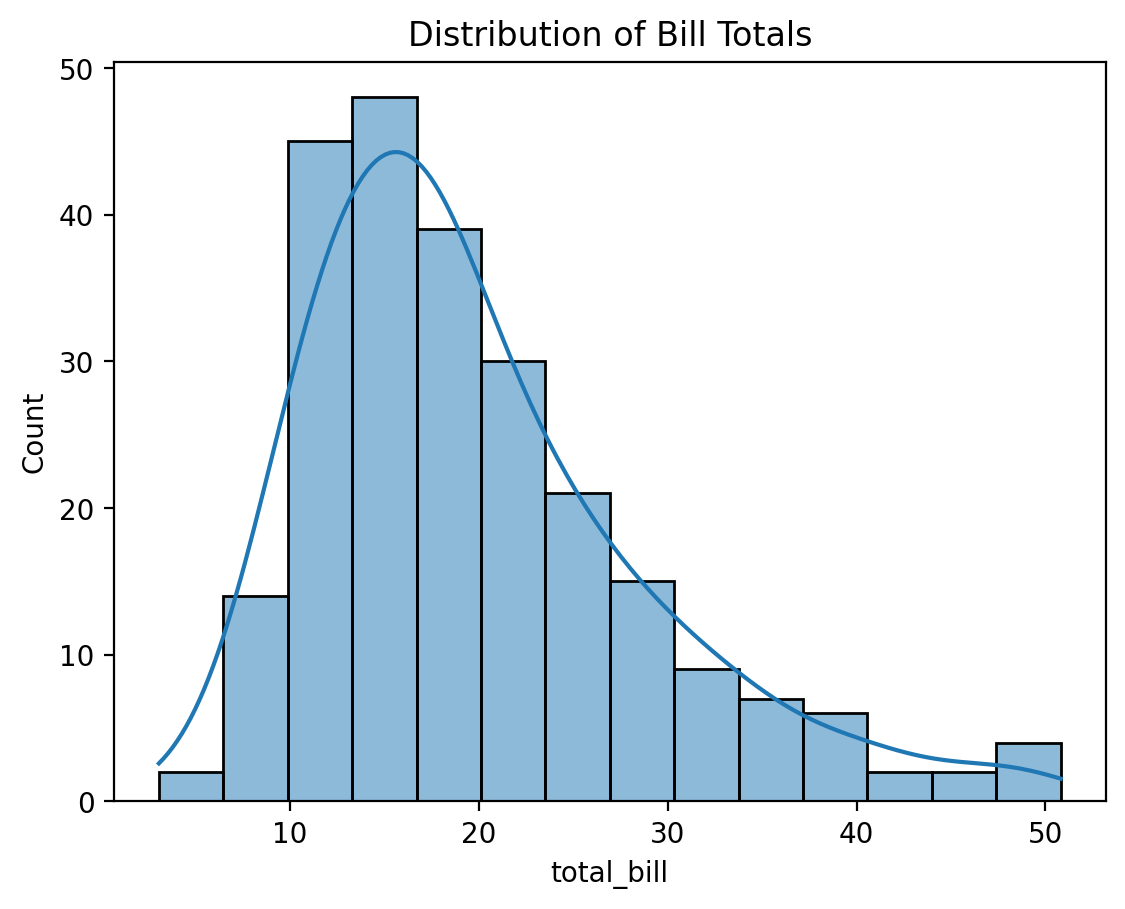

In [87]:
# plotting histogram
ax = sns.histplot(data = df, x = 'total_bill', kde = True)
ax.set_title('Distribution of Bill Totals')

<div class="alert alert-block alert-success">

### Question 8 Response

    
- 
```
min      3.070000
mean    19.785943
max     50.810000
```

---
<div class="alert alert-block alert-info">
    
## Question 9

- Use matplotlib to create a **scatter plot** of total_bill and tips
    - Plot total_bill along the x-axis

- Customize the visualization in at least one way
- Add axis labels and a title

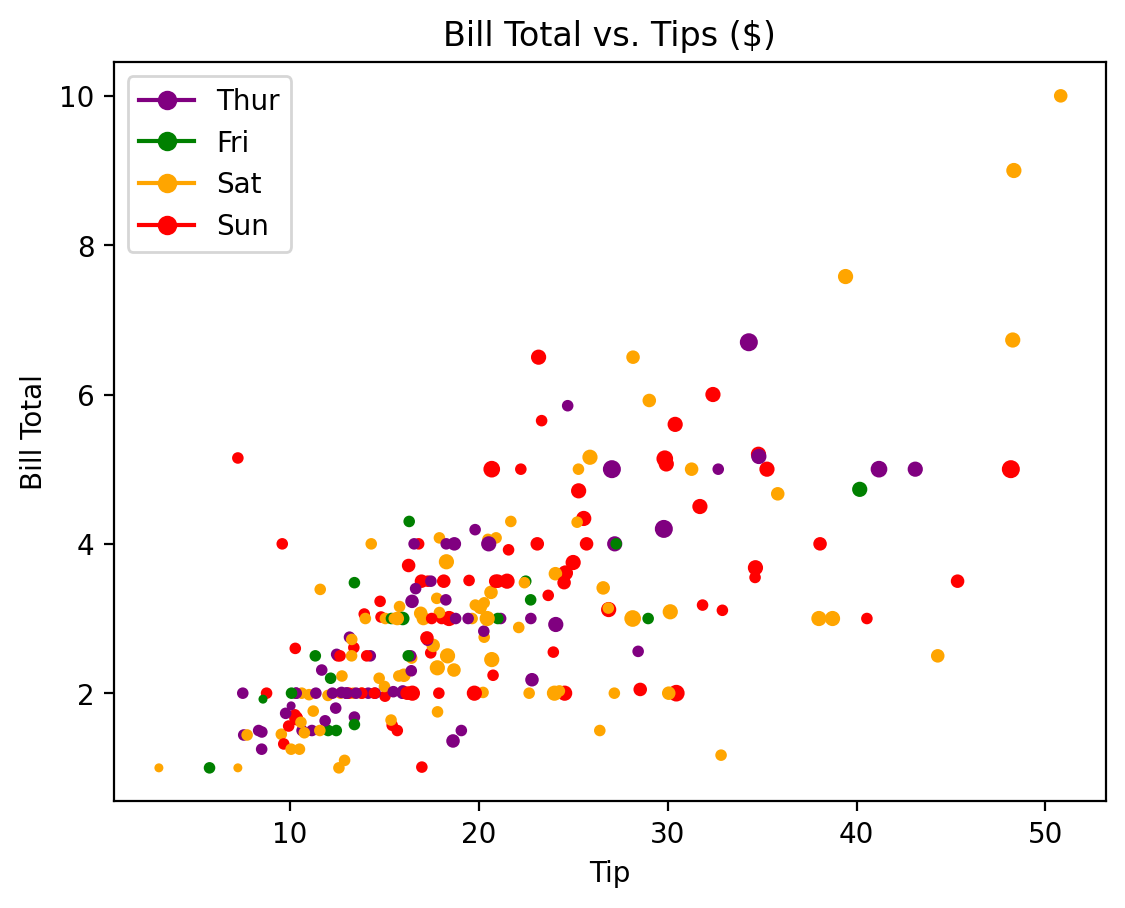

In [109]:
category_colors = {'Thur': 'purple', 'Fri': 'green', 'Sat': 'orange', 'Sun':'red'}
colors = [category_colors[day] for day in df['day']]

plt.scatter(x = df['total_bill'], y = df['tip'], c=colors,
           s = df['table_size'] * 5)

# adding title
plt.title('Bill Total vs. Tips ($)')

# labeling axes
plt.ylabel('Bill Total')
plt.xlabel('Tip')

# Create custom legend handles
legend_handles = []
for category, color in category_colors.items():
    legend_handles.append(plt.Line2D([], [], marker='o', color=color, label=category))

# Add the legend
plt.legend(handles=legend_handles, loc='upper left')